In [64]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt


# 1. Defining the structure

We want to model a photonic crystal with lattice constant *a* = 0.420 microns. 
- radius = 0.3a
- wavelength range from 1.50 to 1.56 microns
- (x, y, z) dimensions = (15, 10, 0.26)
- refractive index = 3.23

For now, we ignore thickness and treat the crystal as a 2-dimensional structure. 

In [65]:
resolution = 20
a = 0.420
w = 15
h = 10
d = 0.26
r = 0.3 * a
default_material = mp.Medium(epsilon=10.4329)

wvg_height = a
wvg_width = 10*a

def get_hole_centers(w, h, a, line_defect=False):
    horizontal_spacing = a * np.sqrt(3) / 2
    padding = 0.0

    h = h - padding
    w = w - padding

    num_rows = int(h // a)
    halfway_point = num_rows // 2

    start_x = -w / 2
    end_x = w / 2

    hole_centers = []

    for row in range(0, num_rows):
        if line_defect and row == halfway_point:
            continue

        y = (row - halfway_point) * a
        x = start_x
        if row % 2 == 1:
            x += horizontal_spacing / 2
        
        while x <= end_x:
            hole_centers.append((x, y))
            x += horizontal_spacing

    return hole_centers

sx = w + wvg_width
sy = h
cell = mp.Vector3(sx,sy,0)

dpml = 1.0
pml_layers = [mp.PML(dpml, side=mp.Low, direction=mp.Y), 
              mp.PML(dpml, side=mp.High, direction=mp.Y),
              mp.PML(dpml, side=mp.High, direction=mp.X),
              mp.PML(thickness=dpml + wvg_width/2, side=mp.Low, direction=mp.X)]

hole_centers = get_hole_centers(w, h, a, line_defect=True)
holes = [mp.Cylinder(r, center=mp.Vector3(x, y), material=mp.air) 
         for x, y in hole_centers]


geometry = [mp.Block(size=mp.Vector3(w, h, mp.inf),
                     center=mp.Vector3(),
                     material=default_material),
                     mp.Block(size=mp.Vector3(wvg_width, wvg_height, mp.inf),
                              center=mp.Vector3(w/2 + wvg_width/2),
                              material=default_material),
                     *holes,
                     ]

for hole in holes[0:10]:
    print(hole.center)

Vector3<-7.5, -4.62, 0.0>
Vector3<-7.136269330410536, -4.62, 0.0>
Vector3<-6.772538660821072, -4.62, 0.0>
Vector3<-6.408807991231607, -4.62, 0.0>
Vector3<-6.045077321642143, -4.62, 0.0>
Vector3<-5.681346652052679, -4.62, 0.0>
Vector3<-5.317615982463215, -4.62, 0.0>
Vector3<-4.953885312873751, -4.62, 0.0>
Vector3<-4.590154643284286, -4.62, 0.0>
Vector3<-4.226423973694822, -4.62, 0.0>


Now we define a light source. This is a Gaussian source near the left side of the device, in the center of a group of holes. What we really want here is a quantum dot source.  

In [66]:
fcen = 0.641  # pulse center frequency
df = 0.01     # pulse width (in frequency)

source_x_center = (holes[3].center.x + holes[4].center.x) / 2

sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ez,
                     center=mp.Vector3(source_x_center),
                     size=mp.Vector3(0,a/8,0))]

     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     cylinder, center = (-7.5,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-7.13627,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.77254,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.40881,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.04508,-4.62

<Axes: xlabel='X', ylabel='Y'>

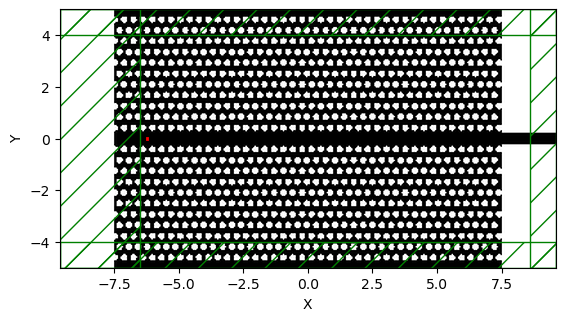

In [67]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
sim.plot2D()

### 1b. Visualize the field

In [68]:
sim.run(until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00861502 s
Working in 2D dimensions.
Computational cell is 19.2 x 10 x 0 with resolution 20
     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     cylinder, center = (-7.5,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-7.13627,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.77254,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.

FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 169.15/200.0 = 84.6% done in 4.0s, 0.7s to go
on time step 6772 (time=169.3), 0.000590761 s/step
run 0 finished at t = 200.0 (8000 timesteps)


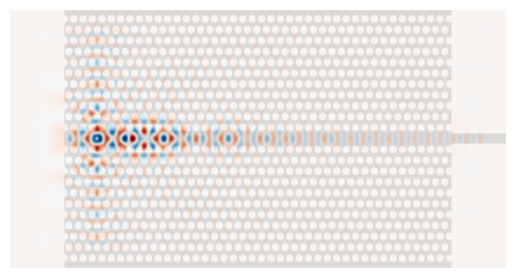

In [69]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

# 2. Get the Flux

Let's get the transmission spectrum at the right end of the waveguide, right before the edge of the cell. 

To do this, we need to determine the transmittance in the waveguide structure and normalize it by the incident power (computed by using the same point in a structure that only contains air).

First, we compute the transmittance from the structure itself. 

     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     cylinder, center = (-7.5,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-7.13627,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.77254,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.40881,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder

, center = (-6.04508,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-5.68135,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-5.31762,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-4.95389,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     ...(+ 906 objects not shown)...


<Axes: xlabel='X', ylabel='Y'>

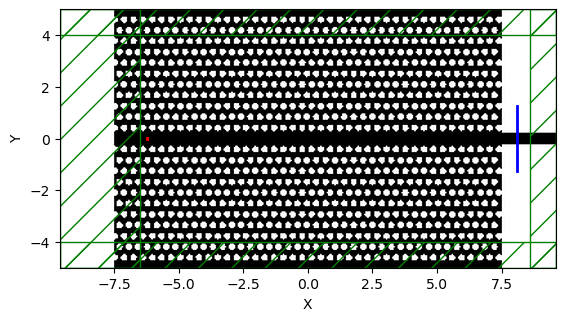

In [70]:
nfreq = 500  # number of frequencies at which to compute flux

# transmitted flux (across a 3a tall line, 0.1 micron from the right edge of the waveguide)

flux_x = w / 2  + wvg_width/2 - dpml - 0.5

tran_fr = mp.FluxRegion(center=mp.Vector3(flux_x, 0, 0), size=mp.Vector3(0, h/4,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

sim.plot2D()

In [71]:
pt = mp.Vector3(flux_x, h/4)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

field decay(t = 200.0): 5.879457730978093e-13 / 5.879457730978093e-13 = 1.0
field decay(t = 250.025): 7.364193932325393e-11 / 7.364193932325393e-11 = 1.0
on time step 11579 (time=289.475), 0.000832206 s/step
field decay(t = 300.05): 1.152829577268869e-09 / 1.152829577268869e-09 = 1.0
field decay(t = 350.07500000000005): 1.0594677074667969e-08 / 1.0594677074667969e-08 = 1.0
field decay(t = 400.1): 5.513663230790737e-08 / 5.513663230790737e-08 = 1.0
on time step 17035 (time=425.875), 0.000733201 s/step
field decay(t = 450.125): 1.506569643010595e-07 / 1.506569643010595e-07 = 1.0
field decay(t = 500.15000000000003): 1.8568504101233463e-07 / 1.8568504101233463e-07 = 1.0
field decay(t = 550.15): 1.7294216038977977e-07 / 1.8568504101233463e-07 = 0.9313736822681996
on time step 23450 (time=586.25), 0.000623542 s/step
field decay(t = 600.1750000000001): 6.980305374784101e-07 / 6.980305374784101e-07 = 1.0
field decay(t = 650.2): 2.2469432765674523e-06 / 2.2469432765674523e-06 = 1.0
field decay(

In [72]:
waveguide_tran_flux = mp.get_fluxes(tran)

# 3. Get flux for a reference structure (all dielectric)

For our reference transmittance, we define a cell with the same dimensions that only contains air. 

     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)


          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)


<Axes: xlabel='X', ylabel='Y'>

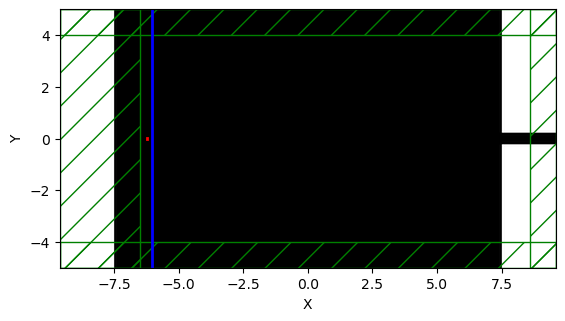

In [100]:
sim.reset_meep()
geometry = []
geometry = [mp.Block(size=mp.Vector3(w, h, mp.inf),
                     center=mp.Vector3(),
                     material=default_material),
            mp.Block(size=mp.Vector3(wvg_width, wvg_height, mp.inf),
                              center=mp.Vector3(w/2 + wvg_width/2),
                              material=default_material),
                     ]
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)


tran_fr = mp.FluxRegion(center=mp.Vector3(source_x_center+0.2, 0, 0), size=mp.Vector3(0,h,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)
sim.plot2D()

In [101]:
pt = mp.Vector3(flux_x, h)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,5e-3))

air_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00026083 s
Working in 2D dimensions.
Computational cell is 19.2 x 10 x 0 with resolution 20
     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
time for set_epsilon = 0.177097 s
-----------
on time step 5975 (time=149.375), 0.000669526 s/step
on time step 10861 (time=271.525), 0.000818797 s/step
on time step 17577 (time=439.425), 0.000595721 s/step
on time step 24584 (time=614.6), 0.000570895 s/step
on time step 31465 (time=786.625), 0.000581354 s/step
on time step 38383 (time=959.575), 0.000578251 s/step
run 0 finished at t = 1000.5 (40020 timesteps)


### 3b. Plotting the field for the reference structure

In [84]:
sim.run(until=200)

FloatProgress(value=1015.125, description='0% done ', max=1215.125, min=1015.125)

on time step 43299 (time=1082.48), 0.000547563 s/step
Meep progress: 193.35000000000014/1215.125 = 15.9% done in 4.0s, 21.1s to go
run 1 finished at t = 1215.125 (48605 timesteps)


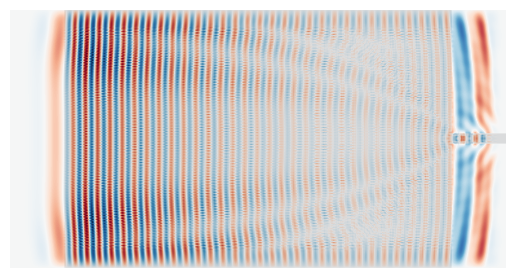

In [85]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

# Plot the transmittance spectrum

In the following plot, transmittance is calculated by normalizing the waveguide transmittance flux by the air transmittance flux. Note that the transmittance sometimes goes above 1 because we are normalizing it by the flux in a region that likely gets less of that wavelength when there is no waveguide present. 

Is there a better reference to compare this against?

In [102]:
print(waveguide_tran_flux)

[0.0001603079872669063, 0.000171035938653479, 0.00018194463399497362, 0.00019301785888565566, 0.000204248943389681, 0.0002156427977430754, 0.0002272179494459698, 0.0002390085417395819, 0.00025106625120634325, 0.0002634620807521286, 0.0002762879836062134, 0.0002896582743050044, 0.000303710783952932, 0.0003186077194508598, 0.0003345361898556827, 0.0003517083676227728, 0.00037036125813108317, 0.0003907560575965601, 0.00041317708716827675, 0.00043793029956656904, 0.00046534136397318913, 0.0004957533448751141, 0.0005295240010103333, 0.0005670227413295685, 0.0006086272856997237, 0.0006547200887865455, 0.0007056845958665328, 0.0007619014090315707, 0.0008237444510931397, 0.0008915772222175176, 0.0009657492506841119, 0.0010465928439617792, 0.001134420249216073, 0.0012295213333354223, 0.001332161891319717, 0.0014425826883021037, 0.0015609993344956497, 0.0016876030838645004, 0.001822562636363412, 0.0019660270101061654, 0.002118129534040203, 0.002278992993620098, 0.002448735941895993, 0.0026274801

In [103]:
print(air_tran_flux)

[0.00015175729824299663, 0.00016423647517248936, 0.00017768533086892172, 0.00019217439049207694, 0.00020777891414651168, 0.00022457918391185846, 0.00024266080596335816, 0.00026211502841156796, 0.00028303907550458735, 0.0003055364988462073, 0.0003297175463058895, 0.00035569954929822925, 0.00038360732912958855, 0.00041357362311933367, 0.00044573953120472047, 0.00048025498377015025, 0.0005172792314134565, 0.0005569813574080086, 0.00059954081359323, 0.0006451479804475646, 0.000694004752093584, 0.0007463251469812211, 0.0008023359450089723, 0.0008622773518106387, 0.0009264036909605349, 0.0009949841248191895, 0.0010683034047382425, 0.001146662651330771, 0.0012303801654902978, 0.0013197922708297878, 0.0014152541881821588, 0.0015171409427786288, 0.0016258483046943358, 0.0017417937631119425, 0.001865417534922752, 0.001997183608132391, 0.0021375808205064523, 0.0022871239738245903, 0.002446354984076267, 0.0026158440678442315, 0.002796190965090014, 0.002988026198460108, 0.0031920123691654583, 0.003

In [90]:
print(mp.dft_ldos(fcen, df, nfreq))

<function dft_ldos.<locals>._ldos at 0x7fbba18427a0>


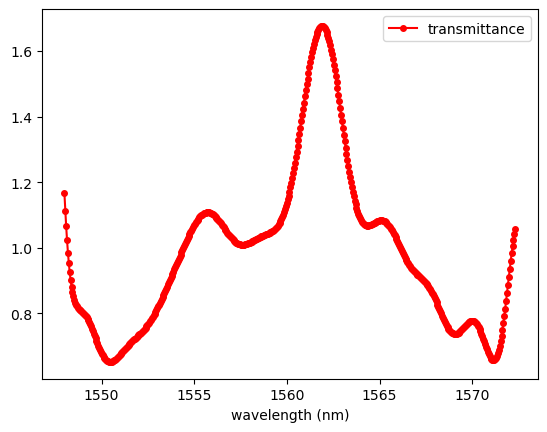

In [104]:
wl = []
Rs = []
Ts = []
for i in range(nfreq):
    wl = np.append(wl, 1000 * 1/flux_freqs[i])
    Ts = np.append(Ts,waveguide_tran_flux[i]/air_tran_flux[i])

if mp.am_master():
    plt.figure()
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize=4)
    # plt.axis([1500, N, 0, 1])
    plt.xlabel("wavelength (nm)")
    plt.legend(loc="upper right")
    plt.show()